# Tutorial 7
## Unsupervised Machine Learning Algorithms

In [1]:
from preamble import *
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
X_train

array([[ 15.22 ,  30.62 , 103.4  , ...,   0.236,   0.409,   0.141],
       [ 14.96 ,  19.1  ,  97.03 , ...,   0.149,   0.296,   0.085],
       [ 14.68 ,  20.13 ,  94.74 , ...,   0.161,   0.303,   0.082],
       ...,
       [ 17.2  ,  24.52 , 114.2  , ...,   0.19 ,   0.331,   0.134],
       [ 14.03 ,  21.25 ,  89.79 , ...,   0.08 ,   0.223,   0.076],
       [ 13.03 ,  18.42 ,  82.61 , ...,   0.05 ,   0.199,   0.062]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(X_train)

StandardScaler()

In [8]:
# X_train_scaled = scaler.transform(X_train)

In [9]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [-1.983 -2.212 -1.94  -1.419 -3.177 -1.673 -1.113 -1.25  -2.756 -1.854
 -1.022 -1.487 -1.021 -0.704 -1.719 -1.302 -1.08  -1.864 -1.395 -1.048
 -1.679 -2.178 -1.651 -1.188 -2.749 -1.478 -1.325 -1.72  -2.274 -1.7  ]
per-feature maximum after scaling:
 [ 3.887  4.586  3.892  5.108  4.851  3.575  4.254  3.9    4.544  4.858
  8.499  6.272  9.093 10.176 

In [10]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[-1.786 -2.058 -1.757 -1.345 -2.043 -1.441 -1.113 -1.25  -1.631 -1.896
 -1.035 -1.441 -0.977 -0.696 -1.346 -1.22  -1.08  -1.864 -1.608 -0.98
 -1.529 -1.83  -1.533 -1.124 -2.003 -1.322 -1.325 -1.72  -2.275 -1.71 ]
per-feature maximum after scaling:
[3.64  3.329 3.634 4.413 3.337 4.728 3.608 3.557 4.05  5.107 3.041 2.374
 3.441 2.383 2.921 4.131 9.219 3.369 7.513 2.944 3.374 2.569 3.278 3.928
 3.493 5.204 4.819 2.314 6.522 7.339]


## Principal Component Analysis (PCA)

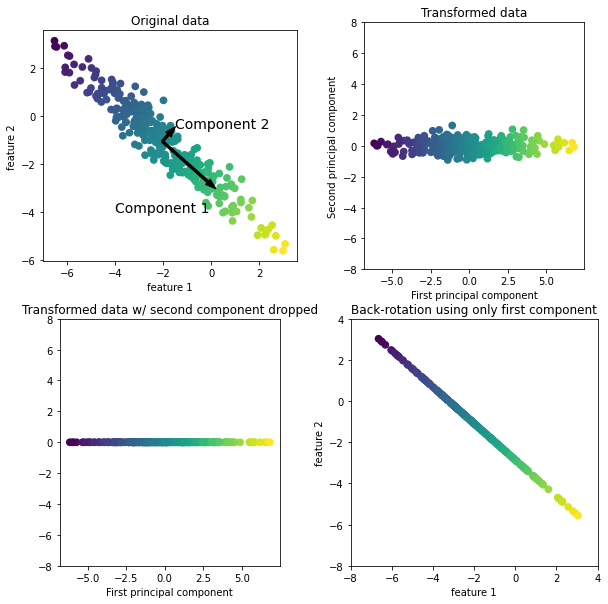

In [11]:
import pandas as pd
mglearn.plots.plot_pca_illustration()

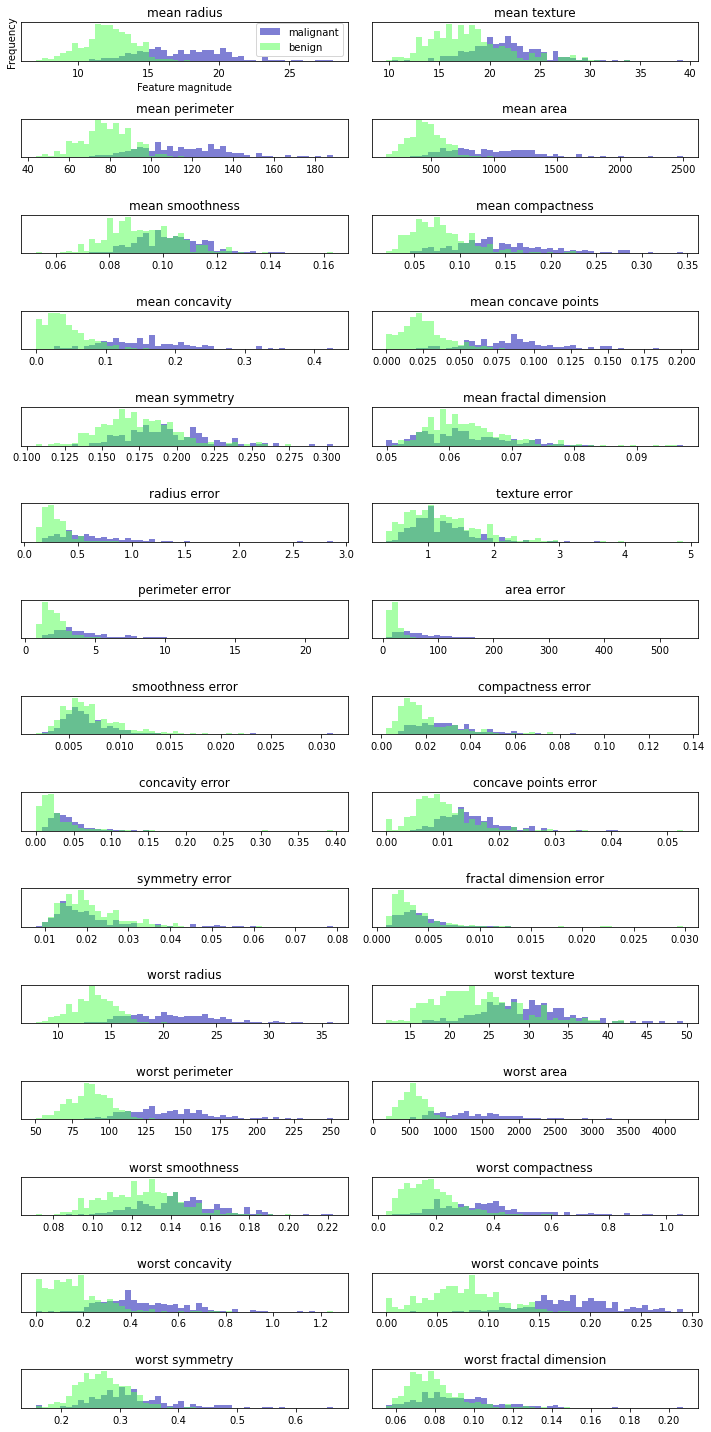

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [24]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
# pca = PCA(n_components = 4)
pca = PCA()
# fit PCA model to breast cancer data
principalComponents_breast = pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 30)


In [25]:
principalComponents_breast.explained_variance_

array([13.305,  5.701,  2.823,  1.984,  1.652,  1.209,  0.676,  0.477,
        0.418,  0.351,  0.294,  0.262,  0.242,  0.157,  0.094,  0.08 ,
        0.06 ,  0.053,  0.05 ,  0.031,  0.03 ,  0.027,  0.024,  0.018,
        0.016,  0.008,  0.007,  0.002,  0.001,  0.   ])

Text(0, 0.5, 'Second principal component')

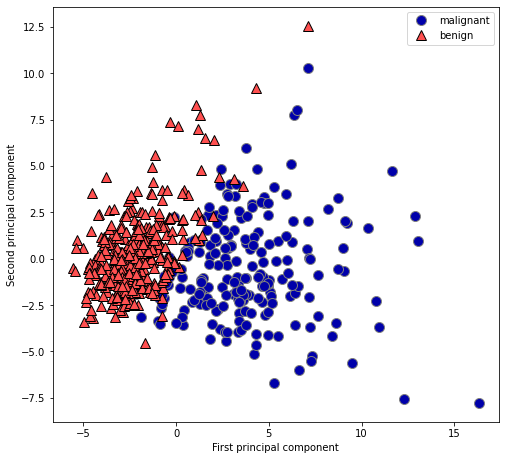

In [11]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [15]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [13]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Principal components')

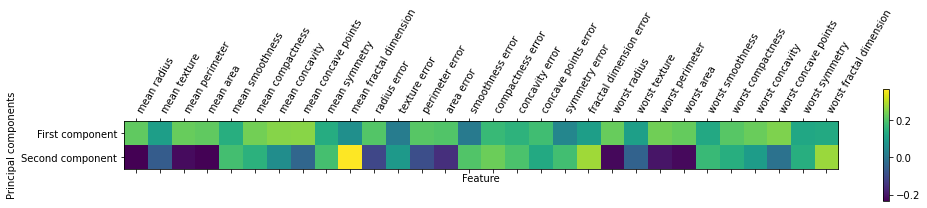

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## k-Means Clustering

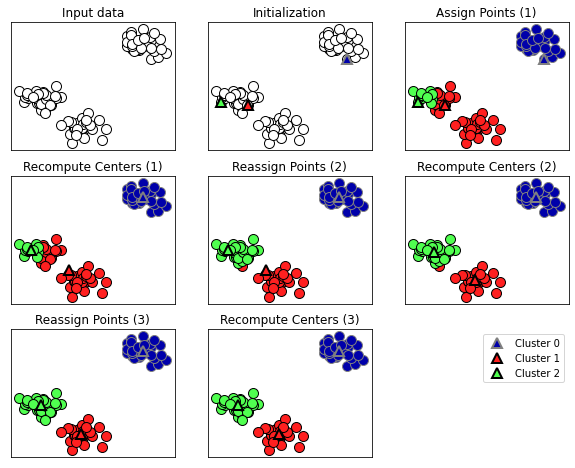

In [15]:
mglearn.plots.plot_kmeans_algorithm()

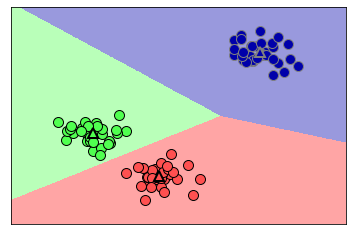

In [16]:
mglearn.plots.plot_kmeans_boundaries()

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
# kmeans = KMeans(n_clusters = 3)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [38]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]


In [39]:
print(kmeans.predict(X))

[0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0]


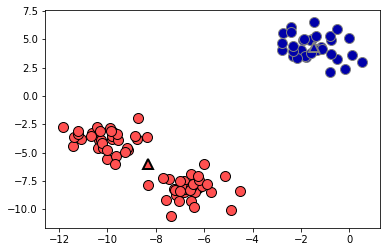

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1],
# kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

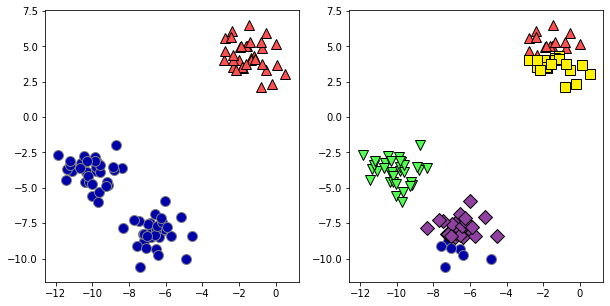

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Feature 1')

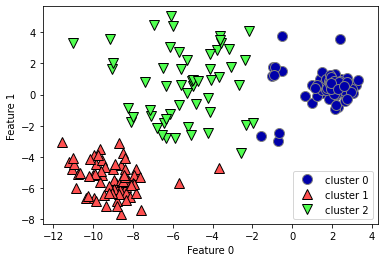

In [22]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Reference: 
### Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.